# Maximal Clique Problem
## Report of implementations
**Student:** Matheus Silva Melo de Oliveira

**Institution:** Insper Instituto de Ensino e Pesquisa

<div align="center">
<img width="400px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png"/>
</div>

## Motivation
The concept of a clique in a graph is relatively simple. At the most general level, a clique is a subset of a network in which the actors are more closely connected to each other than to other members of the network. In terms of friendship ties, for example, it is not uncommon to find human groups that form cliques based on age, gender, race, ethnicity, religion, ideology, and many other factors. A clique is, therefore, a set of vertices in a graph where every pair of vertices is directly connected by an edge.

Finding the maximum clique in a graph is a computationally challenging task due to the combinatorial nature of the problem. The computational difficulty arises from the need to explore all possible combinations of vertices to identify the largest clique, which becomes exponential in relation to the number of vertices. This results in high computational complexity, even for moderately large graphs.

Cliques are important because, in addition to developing homogeneous behaviors among their members, they have, by definition, great proximity, increasing the speed of exchanges. Thus, information directed at a clique is quickly absorbed by its members, who tend to perceive it similarly. This is important, for example, in segmentation strategies.

Therefore, the efficient resolution of the maximum clique problem has valuable applications in areas ranging from computer science to data analysis in social networks.



**It's expected to run  this notebook in Google Colab, to run in a local machine (Linux ou WSL), run *run.sh* file**

## Setup

In [1]:
%cd "../.."
!rm -rf Maximal-Clique-Problem

/


In [2]:
!git clone https://github.com/matheus-1618/Maximal-Clique-Problem

Cloning into 'Maximal-Clique-Problem'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 265 (delta 147), reused 160 (delta 69), pack-reused 0
Receiving objects: 100% (265/265), 2.71 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [3]:
%cd "Maximal-Clique-Problem/src"

/Maximal-Clique-Problem/src


## Generating the graph
Using the python lib *networkx*, we create a graph that it's going to be used in the implementations trough this report.

In [13]:

import networkx as nx
import matplotlib.pyplot as plt
import random
import sys

def generate_graph(vertex: int, plot: bool):
    # Parameters
    num_vertices = vertex  # Number of vertices in the graph
    probability_connection = 0.7  # Probability of having an edge between two vertices (adjust as needed)

    # Create a densely connected random graph
    graph = nx.fast_gnp_random_graph(num_vertices, probability_connection)

    # Output file name
    file_name = "implementations/graph.txt"
    # Open the file for writing
    with open(file_name, 'w') as file:
        # Write the number of vertices and the number of edges in the first line
        file.write(f"{num_vertices} {graph.number_of_edges()}\n")

        # Write the edges in the adjacency list format
        for edge in graph.edges():
            file.write(f"{edge[0] + 1} {edge[1] + 1}\n")  # +1 to adjust the indices (starting at 1)

    #print(f"Densely connected graph generated and saved in '{file_name}'.")

    if plot:
        # Plot the graph
        pos = nx.spring_layout(graph)  # Layout algorithm (you can choose other layouts)
        nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
                font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

        # Show the plot
        plt.show()



Densely connected graph generated and saved in 'implementations/graph.txt'.


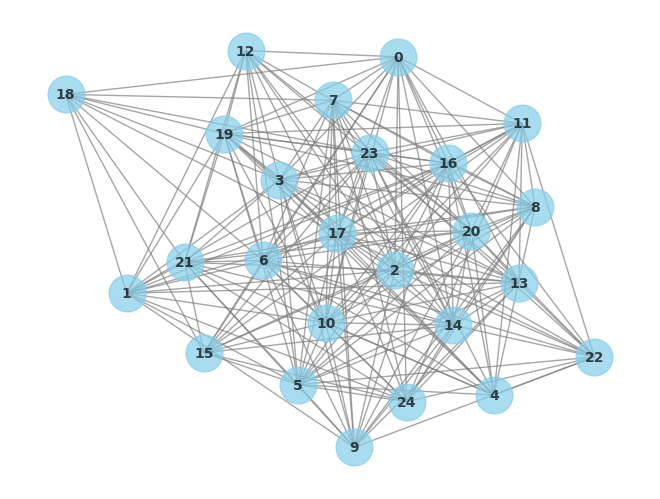

In [7]:
generate_graph(25,True)

## First Implementation: Exaustive Search trough Recursion
In the file named **1_exaustive_recursive.cpp** , we use the exaustive search to enumerate all cliques in the graph, and keep in memory the largest clique found.

**Recursive Formula for Cliques**

*Base Case*:

For each vertex $v \in V$, a single vertex is a clique:
$$
 C(v) = \{v\}
$$

*Recursive Case:*

A set of vertices $V'$ forms a clique if, when combined with any other vertex in the set, they still form a clique:
$$C(V') = \{v\} \cup C(V' - \{v\}) $$
where $V'$ is a set of vertices, $v$ is a vertex in $V'$, and $V' - \{v\}$ represents the set $V'$ with $v$ removed.


The implementation code can be seen here:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

### Testing the implementation results
Comparing the results of the Recursive implementation against verification to compare the results.

In [10]:
!g++ -Wall -O3 -g implementations/1_exaustive_recursive.cpp -o 1_exaustive_recursive

In [34]:
import pandas as pd
import time
import subprocess
import matplotlib.pyplot as plt
recursive = []
verification = []
tamanhos = [5, 10, 25, 50, 75, 100]  # Add more sizes if needed

# Create an empty DataFrame
df = pd.DataFrame(columns=['Node Size', 'Recursive Max Clique Size', 'Verification Max Clique Size'])

for size in tamanhos:
    generate_graph(size, False)

    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    recursive.append(proc_recursive.stdout.split(":")[1].split(" ")[1])

    proc_verification = subprocess.run(['python', 'python/verify_clique.py'], text=True, capture_output=True)
    verification.append(proc_verification.stdout.split(":")[1].split(" ")[1])

# Append the results to the DataFrame
df['Node Size'] = tamanhos
df["Recursive Max Clique Size"] = recursive
df['Verification Max Clique Size'] = verification

# Print the DataFrame
df


,Node Size,Recursive Max Clique Size,Verification Max Clique Size
0,5,3,3
1,10,5,5
2,25,8,8
3,50,11,11
4,75,14,14
5,100,14,14


As we can see for the table above, the implementation is obtaining the optimal solution for the problem in all the cases tested.

## Second implementation: Greedy Heuristics based on Degree
Although the recursive approach always give us the optimal solution, its time grows exponentially accordlying the size of the graph.
Furthermore, we can use the number of the degree of each vertex (descending order), to iterate first each vertex with more edges to try to achieve results near the optimal solution.

We can use the following pseudo code to base our implementation:

### Degree-Based Heuristic for Maximal Clique

Let $ G = (V, E) $ be an undirected graph with vertices $ V $ and edges $ E $. The degree-based heuristic for finding a maximal clique is as follows:

1. For each vertex v in the graph:
    - Calculate the degree of v.
    - Create a structure for v with id = v and edges = degree of v.
    - Add the structure to the list of candidates.

2. Order the list of candidates in descending order based on their edges.

3. Initialize an empty set C to store the vertices of the maximal clique.

4. For each vertex in the ordered list of candidates:
    - Initialize an empty list localCandidates to store nodes.
    - Initialize an empty list Clique to store vertices.
    - While localCandidates is not empty:
        - Pop a node u from localCandidates.
        - Check if adding u to Clique violates the clique property.
        - If not, add u.id to Clique.
        - Update localCandidates to include only nodes adjacent to all vertices in Clique.
    - Rotate the list of candidates.

5. The set C now represents a maximal clique in the graph.

**Furthermore, the code implementation is the following**:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

struct node {
    int id;
    int edges;
};

bool biggerThan(int a, int b){
    return a < b;
}

bool biggerEdges(node a, node b){
    return a.edges < b.edges;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

vector<int> FindMaximalClique(vector<vector<int>>& graph, int numVertex) {
    vector<int> MaximalClique;
    vector<node> candidates;

    // In the beginning, all nodes are possible candidates
    for (int i = 0; i < numVertex; ++i) {
        node candidate;
        candidate.id = i;
        candidate.edges = 0;
        int edges = 0;
        for (int j = 0; j < numVertex; j++){
            edges += graph[j][i];
        }
        candidate.edges = edges;
        candidates.push_back(candidate);
    }
    
    sort(candidates.begin(), candidates.end(), biggerEdges);

    for (int i = 0; i < numVertex; ++i) {
        vector<node> localCandidates = candidates;
        vector<int> Clique;
        while (!localCandidates.empty()) {
            node v = localCandidates.back();
            localCandidates.pop_back();
            bool canAdd = true;

            for (int u : Clique) {
                if (graph[u][v.id] == 0) {
                    canAdd = false;
                    break;
                }
            }

            if (canAdd) {
                Clique.push_back(v.id);
                vector<node> newLocalCandidates;
                for (node u : localCandidates) {
                    bool adjacentToAll = true;
                    for (int c : Clique) {
                        if (graph[u.id][c] == 0) {
                            adjacentToAll = false;
                            break;
                        }
                    }
                    if (adjacentToAll) {
                        newLocalCandidates.push_back(u);
                    }
                }
                localCandidates = newLocalCandidates;
            }
        }

        // Rotate candidates after the while loop in the for loop
        std::rotate(candidates.begin(), candidates.end() - 1, candidates.end());

        // Check if the size of the current clique is larger than the existing maximal clique
        if (MaximalClique.size() < Clique.size()) {
            MaximalClique = Clique;
        }
    }

    return MaximalClique;
}


int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph, numVertex);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);

    cout << "[Implementation-Heuristics] Clique's Size: "<< maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v+1 << " ";
    }
    cout << endl;

    return 0;
}
```

### Testing the implementation of Heuristics implementation
Comparing the results of the Heuristics implementation against verification and Exaustive implementations to see it's efficiency and time reduction.

In [36]:
!g++ -Wall -O3 -g implementations/3_edges_heuristic.cpp -o 3_edges_heuristic

In [53]:
import pandas as pd
import time
import subprocess
import matplotlib.pyplot as plt

heuristics_cliques = []
recursive_cliques = []
verification_cliques = []
heuristics_times = []
recursive_times = []
verification_times = []
tamanhos = list(range(10,140,10))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Max Clique Size', 'Verification Max Clique Size','Heuristics Max Clique Size'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_heuristics = subprocess.run(['./3_edges_heuristic'], text=True, capture_output=True)
    end = time.perf_counter()
    heuristics_times.append(end-start)
    heuristics_cliques.append(int(proc_heuristics.stdout.split(":")[1].split(" ")[1]))


    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['python', 'python/verify_clique.py'], text=True, capture_output=True)
    end = time.perf_counter()
    verification_times.append(end-start)
    verification_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))


df['Graph Size'] = tamanhos
df["Recursive Max Clique Size"] = recursive_cliques
df['Verification Max Clique Size'] = verification_cliques
df['Heuristics Max Clique Size'] = heuristics_cliques
df["Accuracy Rate of Heuristics"] = 100 * (1 - (df['Verification Max Clique Size'] - df['Heuristics Max Clique Size']) / df['Verification Max Clique Size'])


df


,Graph Size,Recursive Max Clique Size,Verification Max Clique Size,Heuristics Max Clique Size,Accuracy Rate of Heuristics
0,10,6,6,6,100.000000
1,20,8,8,7,87.500000
2,30,9,9,9,100.000000
3,40,10,10,10,100.000000
4,50,11,11,11,100.000000
5,60,12,12,11,91.666667
6,70,13,13,12,92.307692
7,80,14,14,13,92.857143
8,90,14,14,13,92.857143
9,100,15,15,13,86.666667


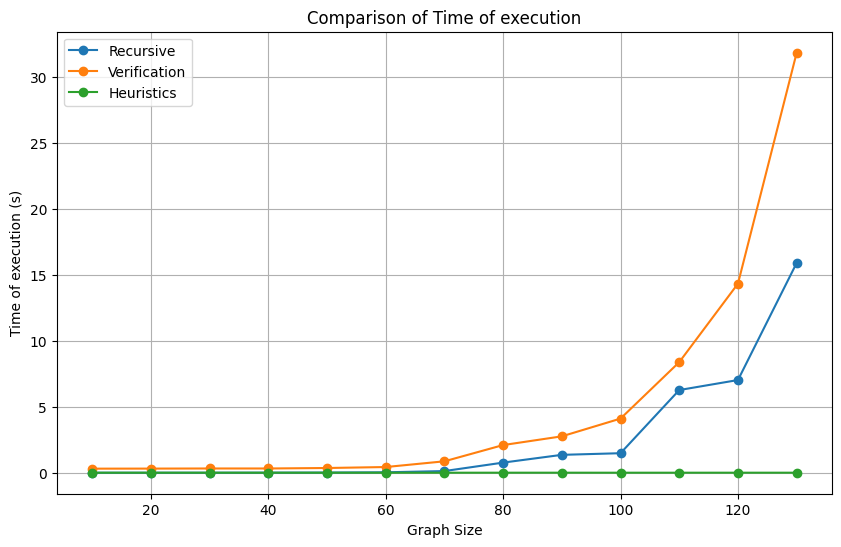

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], verification_times, label='Verification', marker='o')
plt.plot(df['Graph Size'], heuristics_times, label='Heuristics', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

**As seen by the table above, the greedy algorithm  has a good accuracy rate, with rates above 85% in almost all graph sizes, with a enormous advantage in the time of execution as seen the plot comparing it. In sum, is possible to conclude that the Greedy Algorithm has good results in front of the reduction of time in the execution.**

## Third Implementation: Dynamic Programming to decrease time in the exaustive implementation

We can try to decrease time in the exaustive implementation using Dynamic Programming (memoization) to memorize cliques already seen in the algorithm, with the goal of reducing part of the time of execution.
To acomplish it, we can create a auxiliar data strucuture to memorize cliques iterated.

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                memoTable[n][candidate.back()] = false;
                return false;
            }
        }
    }

    // Memoize the result before returning
    memoTable[n][candidate.back()] = true;
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

### Comparing its time effiency
We can compare its time efficiency against the Recursive implementation (without memoization) to compare if there is improvement in the time execution.

In [55]:
!g++ -Wall -O3 -g implementations/4_dynamic_programming.cpp -o 4_dynamic_programming

In [60]:
recursive_times = []
dynamic_times = []
recursive_cliques= []
dynamic_cliques = []
tamanhos = list(range(10,170,10))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Clique', 'Dynamic Programming Clique'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['./4_dynamic_programming'], text=True, capture_output=True)
    end = time.perf_counter()
    dynamic_times.append(end-start)
    dynamic_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))

df['Graph Size'] = tamanhos
df["Recursive Clique"] = recursive_cliques
df['Dynamic Programming Clique'] = dynamic_cliques
df

,Graph Size,Recursive Clique,Dynamic Programming Clique
0,10,5,5
1,20,6,6
2,30,9,9
3,40,10,10
4,50,11,11
5,60,12,12
6,70,13,13
7,80,13,13
8,90,15,15
9,100,14,14


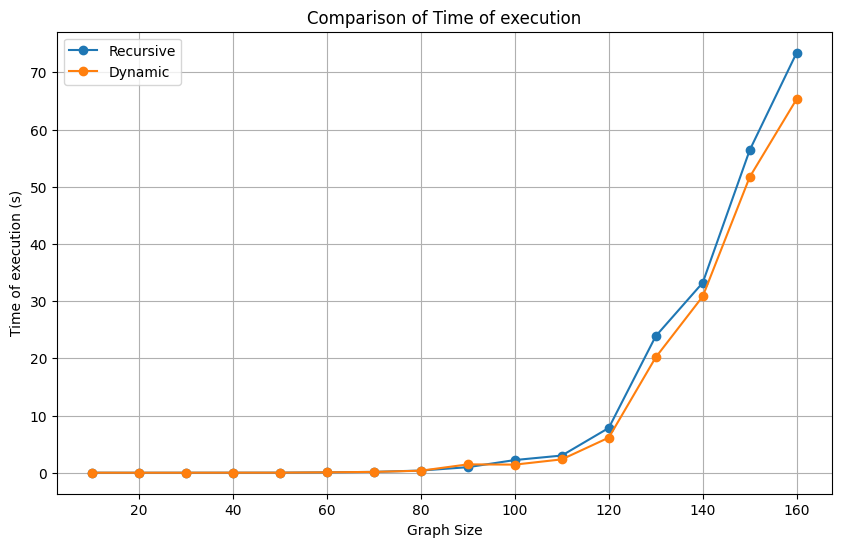

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], dynamic_times, label='Dynamic', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

Using Memoization, is possible to reduce time in the implementation of the exaustive algorithm, but, as we can see in the plot above, there isn't enormous advantages yet.

## Fourth Implementation: Parallel Exaustive Approach
We can try to parallelize portions of the code in the Exaustive approach to get improvements in its time efficiency.
To accomplish it, we can use the **OpenMP** library for C++.

As we are using a recursive approach, a parallelization strategy will not be effective in all portions of the code due to internal calls that can have the opposite effect to that desired.

Thus, we're going to parallelize the following parts of the recursive approach:

1 - Reading the raw graph text file:
```cpp
vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp parallel for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        #pragma omp critical
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}
```

2 - Verification if the set of candidates is a clique or not:

```cpp
bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    for (int i = 0; i < n; ++i) {
        #pragma omp parallel for shared(clique)
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                #pragma omp critical
                clique = false;
            }
        }    
    }
    return clique;
}
```

The others parts although is possible to be parallelized, is hardly to obtain time reduction, mainly because that in the recursive algorithms, the main way to parallelize some sections is creating **tasks**, which in this case, isn't a good solution, since the side effects are more likely to slow the execution, to keep the optimal solution.

The source code of this implementation if below:

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <omp.h>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp parallel for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        #pragma omp critical
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    for (int i = 0; i < n; ++i) {
        #pragma omp parallel for shared(clique)
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                #pragma omp critical
                clique = false;
            }
        }    
    }
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }

    
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v

    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);


    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [91]:
!g++ -Wall -O3 -fopenmp implementations/5_exaustive_recursive_parallel.cpp -o 5_exaustive_recursive_parallel


In [92]:
recursive_times = []
parallel_times = []
recursive_cliques= []
parallel_cliques = []
tamanhos = list(range(10,130,10))

# Create an empty DataFrame
df = pd.DataFrame(columns=['Graph Size', 'Recursive Clique', 'Parallel Recursive Clique'])

for size in tamanhos:
    generate_graph(size, False)

    start = time.perf_counter()
    proc_recursive = subprocess.run(['./1_exaustive_recursive'], text=True, capture_output=True)
    end = time.perf_counter()
    recursive_times.append(end-start)
    recursive_cliques.append(int(proc_recursive.stdout.split(":")[1].split(" ")[1]))

    start = time.perf_counter()
    proc_verification = subprocess.run(['./5_exaustive_recursive_parallel'], text=True, capture_output=True)
    end = time.perf_counter()
    parallel_times.append(end-start)
    parallel_cliques.append(int(proc_verification.stdout.split(":")[1].split(" ")[1]))

df['Graph Size'] = tamanhos
df["Recursive Clique"] = recursive_cliques
df['Parallel Recursive Clique'] = parallel_cliques
df

,Graph Size,Recursive Clique,Parallel Recursive Clique
0,10,5,5
1,20,8,8
2,30,9,9
3,40,10,10
4,50,12,12
5,60,12,12
6,70,13,13
7,80,13,13
8,90,14,14
9,100,15,15


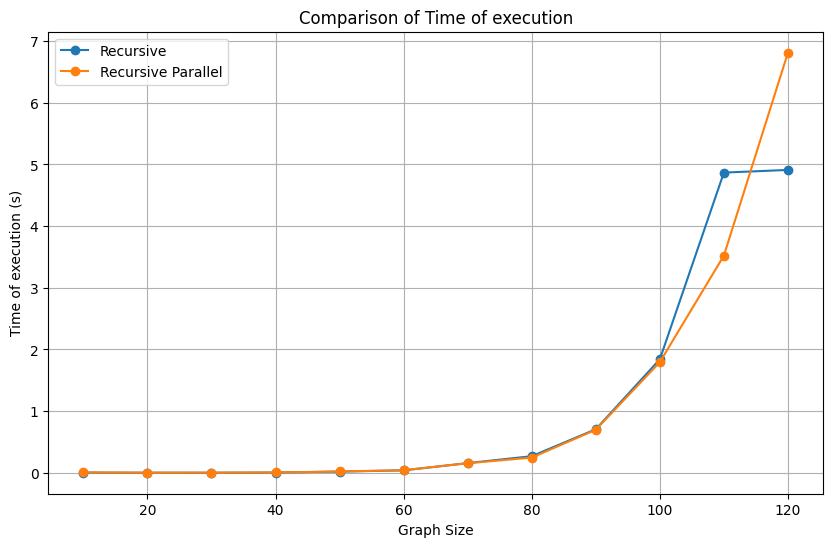

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df['Graph Size'], recursive_times, label='Recursive', marker='o')
plt.plot(df['Graph Size'], parallel_times, label='Recursive Parallel', marker='o')

plt.xlabel('Graph Size')
plt.ylabel('Time of execution (s)')
plt.title('Comparison of Time of execution')
plt.legend()
plt.grid(True)
plt.show()

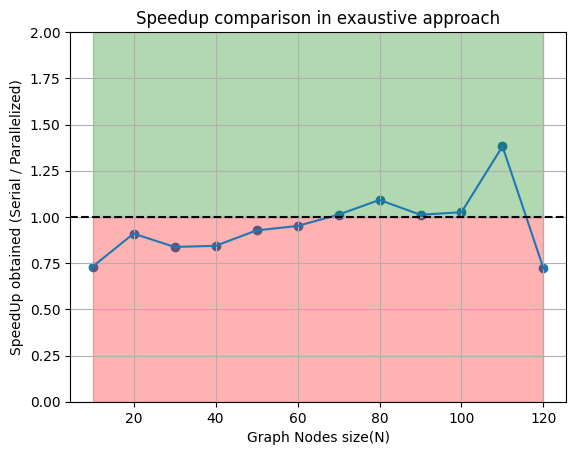

In [94]:
import numpy as np
plt.plot(tamanhos,np.array(recursive_times) / np.array(parallel_times))
plt.scatter(tamanhos,np.array(recursive_times) / np.array(parallel_times))
plt.title("Speedup comparison in exaustive approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(parallel_times) / np.array(recursive_times)
plt.fill_between(tamanhos, 1, 5, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.ylim([0,2])
plt.grid(True)
plt.show()

In [95]:
speedup = np.array(recursive_times) / np.array(parallel_times)
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: -4.86%


#Sixth implementation: Parallel Dynamic Programming

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        #pragma omp critical
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    for (int i = 0; i < n; ++i) {
        #pragma omp for
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                #pragma omp critical
                memoTable[n][candidate.back()] = false;
                clique = false;
            }
        }
    }
    // Memoize the result before returning
    memoTable[n][candidate.back()] = true;
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [11]:
!g++ -Wall -O3 -g -fopenmp implementations/5_dynamic_programming_parallel.cpp -o 5_dynamic_programming_parallel
!./5_dynamic_programming_parallel

[Implementation-Dynamic Parallel] Clique's Size: 15 Maximal Clique: 1 11 14 25 37 44 64 70 73 77 85 90 91 94 98 


## Checking if the obtained Cliques are the maximal one or in the group of Maximals
Using another python script from the lib *networkx*, we can check the maximal Clique and it's size, and compare with the result of our implementations above.  

In [12]:
!python3 python/verify_clique.py

[Verification] Clique's Size: 15 Maximal Clique:  2 14 25 34 35 40 44 49 50 51 52 69 77 78 80


Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.


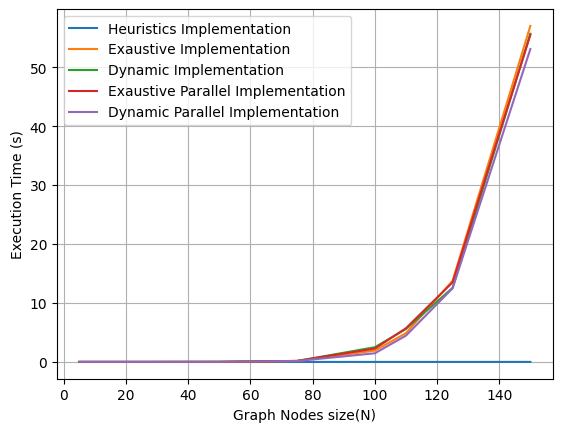

In [13]:
import time
import subprocess
import matplotlib.pyplot as plt
heuristics = []
exaustive = []
dynamic = []
exaustive_parallel = []
dynamic_paralell = []
tamanhos = [5,10,25,50,75,100,110,125,150]
for i in tamanhos:
  generate_graph(i,False)
  start = time.perf_counter()
  proc = subprocess.run(['./1_edges_heuristic'], text=True, capture_output=True)
  end = time.perf_counter()
  heuristics.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./2_recursive_clique'], text=True, capture_output=True)
  end = time.perf_counter()
  exaustive.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./3_dynamic_programming'], text=True, capture_output=True)
  end = time.perf_counter()
  dynamic.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./4_recursive_clique_parallel'], text=True, capture_output=True)
  end = time.perf_counter()
  exaustive_parallel.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./5_dynamic_programming_parallel'], text=True, capture_output=True)
  end = time.perf_counter()
  dynamic_paralell.append(end - start)



plt.plot(tamanhos,heuristics,label="Heuristics Implementation")
plt.plot(tamanhos,exaustive,label="Exaustive Implementation")
plt.plot(tamanhos,dynamic,label="Dynamic Implementation")
plt.plot(tamanhos,exaustive_parallel,label="Exaustive Parallel Implementation")
plt.plot(tamanhos,dynamic_paralell,label="Dynamic Parallel Implementation")

plt.xlabel("Graph Nodes size(N)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.show()

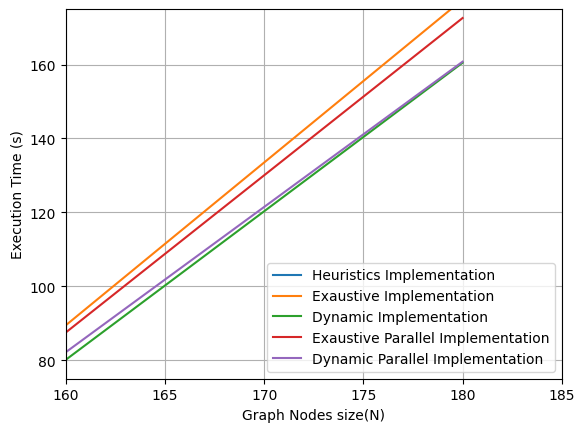

In [ ]:
plt.plot(tamanhos,heuristics,label="Heuristics Implementation")
plt.plot(tamanhos,exaustive,label="Exaustive Implementation")
plt.plot(tamanhos,dynamic,label="Dynamic Implementation")
plt.plot(tamanhos,exaustive_parallel,label="Exaustive Parallel Implementation")
plt.plot(tamanhos,dynamic_paralell,label="Dynamic Parallel Implementation")

plt.xlabel("Graph Nodes size(N)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.xlim([160,185])
plt.ylim([75,175])
plt.show()

## Comparing SpeedUp

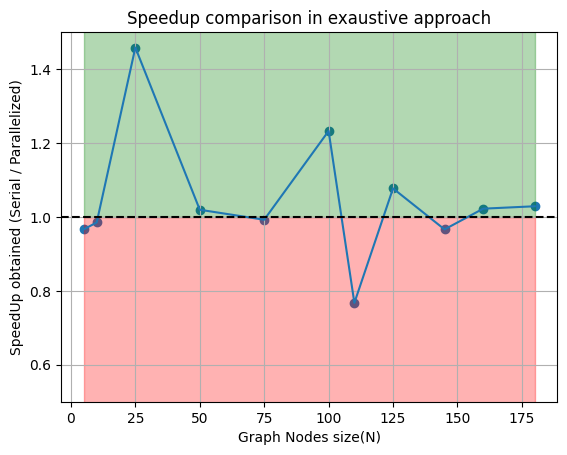

In [ ]:
import numpy as np
plt.plot(tamanhos,np.array(exaustive) / np.array(exaustive_parallel))
plt.scatter(tamanhos,np.array(exaustive) / np.array(exaustive_parallel))
plt.title("Speedup comparison in exaustive approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(exaustive) / np.array(exaustive_parallel)
plt.fill_between(tamanhos, 1, 5, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.ylim([0.5,1.5])
plt.grid(True)
plt.show()

In [ ]:
speedup = np.array(exaustive) / np.array(exaustive_parallel)
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: 4.48%


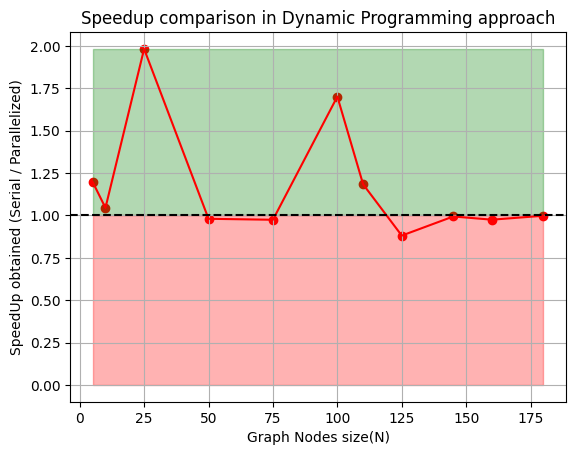

In [ ]:
plt.scatter(tamanhos,np.array(dynamic) / np.array(dynamic_paralell),c="r")
plt.plot(tamanhos,np.array(dynamic) / np.array(dynamic_paralell),color="red")

plt.title("Speedup comparison in Dynamic Programming approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(dynamic) / np.array(dynamic_paralell)
plt.fill_between(tamanhos, 1, max(speedup), color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
#plt.ylim([0.5,1.5])
plt.grid(True)
plt.show()

In [ ]:
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: 14.82%


## Clean up

In [ ]:
%cd "../.."
!rm -rf Maximal-Clique-Problem